In [1]:
#library yang diperlukan
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_squared_error
import seaborn as sns
import  matplotlib.pyplot  as  plt 


In [2]:
#membaca Data
data = pd.read_csv("dataBersih.csv")
data.info()

#melihat apakah ada missing value
data.isnull().sum()
data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6056 entries, 0 to 6055
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  6056 non-null   int64  
 1   sex                  6056 non-null   int64  
 2   on_thyroxine         6056 non-null   int64  
 3   on_antithyroid_meds  6056 non-null   int64  
 4   sick                 6056 non-null   int64  
 5   pregnant             6056 non-null   int64  
 6   thyroid_surgery      6056 non-null   int64  
 7   I131_treatment       6056 non-null   int64  
 8   query_hypothyroid    6056 non-null   int64  
 9   query_hyperthyroid   6056 non-null   int64  
 10  lithium              6056 non-null   int64  
 11  goitre               6056 non-null   int64  
 12  tumor                6056 non-null   int64  
 13  hypopituitary        6056 non-null   int64  
 14  psych                6056 non-null   int64  
 15  TSH                  6056 non-null   f

,age,sex,on_thyroxine,on_antithyroid_meds,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,query_hyperthyroid,lithium,goitre,tumor,hypopituitary,psych,TSH,TT4,T4U,FTI,target
0,63,1,1,0,1,0,0,0,0,0,0,0,0,0,0,68.00,48.0,1.02,47.0,2
1,36,1,0,0,0,0,0,0,1,1,0,0,0,0,0,1.50,90.0,1.06,85.0,0
2,40,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1.20,104.0,1.08,96.0,0
3,40,1,0,0,0,0,0,0,0,0,0,0,0,0,0,5.90,88.0,0.84,105.0,0
4,77,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.05,107.0,1.13,95.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6051,84,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.34,105.0,0.93,113.0,0
6052,80,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3.30,111.0,0.92,121.0,0
6053,16,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2.60,122.0,0.86,142.0,0
6054,54,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.10,105.0,0.82,128.0,0


In [3]:
#membagi data menjadi x (fitur) dan y (target)
x = data.drop('target', axis = 1)
y = data['target']

In [4]:
#membagi data x dan y menjadi data latih dan data uji 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, stratify = y, random_state = 42)

In [5]:
scaler = StandardScaler()

scaler.fit(x_train)
scaler.fit(x_test)

StandardScaler()

In [6]:
x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.fit_transform(x_test)

In [7]:
#pemodelan data
classifier = KNeighborsClassifier(n_neighbors=5)  #k = 5
classifier.fit(x_train, y_train) 

KNeighborsClassifier()

In [8]:
#akurasi data latih dan uji
acc = (classifier.score(x_train , y_train)*100)
print(f'Akurasi Data Latih {acc:.2f}')

acc =(classifier.score(x_test , y_test)*100)
print(f'Akurasi Data Uji {acc:.2f}')

Akurasi Data Latih 96.30
Akurasi Data Uji 95.21


In [9]:
#memprediksi hasil data uji
y_pred = classifier.predict(x_test)
y_pred = (y_pred > 0.5)

Text(0.5, 1.0, 'Confusion Matrix KNN')

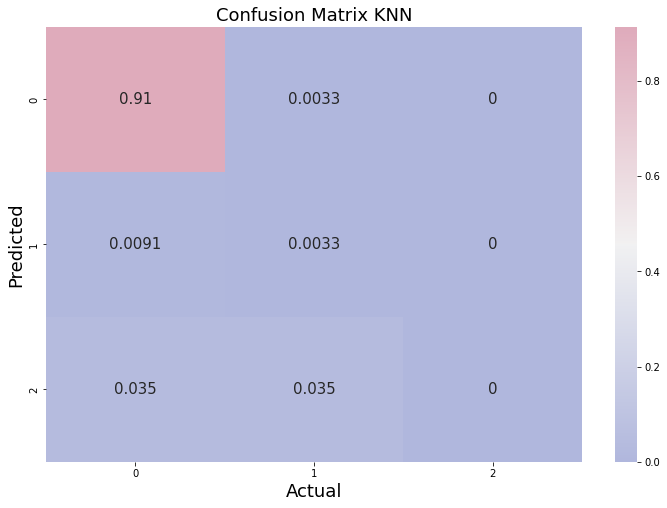

In [10]:
# confusion matrix

from sklearn.metrics import confusion_matrix

cmap1 = sns.diverging_palette(260,-10,s=50, l=75, n=5, as_cmap=True)
plt.subplots(figsize=(12,8))
cf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(cf_matrix/np.sum(cf_matrix), cmap = cmap1, annot = True, annot_kws = {'size':15})
plt.ylabel('Predicted', fontsize=18)
plt.xlabel('Actual', fontsize=18)
plt.title('Confusion Matrix KNN', fontsize=18)

In [11]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97      1111
           1       0.08      0.27      0.12        15
           2       0.00      0.00      0.00        86

    accuracy                           0.92      1212
   macro avg       0.34      0.42      0.37      1212
weighted avg       0.88      0.92      0.89      1212



c:\Users\ASUS\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\ASUS\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\ASUS\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
